# 药效团
成药靶点中必定存在着能与药物结合的特异性结合位点。对某个靶点发挥活性的化合物在结构特征上必定有相似之处。这些化合物的最普遍的共有特性被定义为药效团（pharmacophore）

### 概念
药效团指纹综合考虑了化学信息和结构信息，从原理上适合于描述分子间的相互作用。化学信息指的是利用SMARTS定义的一套原子类型的指定规则；结构信息指的是通过2D分子图上一对原子间的最短路径，为选取的原子对（二元组）、三元组、四元组等等引入几何信息。


所有可行的组合：（参与原子数，原子类型，距离）（# point, patterns, distance bins）均作为一位(bit)，形成具有固定长度的药效团指纹(pharmacophore fingerprints)。


## 药效团模型的重要意义
药效团模型不仅仅利用分子拓扑学相似性而且利用了基团的功能相似性，从而运用了生物电子等排体（bioisosterism）的概念使得模型更加可靠。如果仅仅考虑化合物之间形状的相似性，将会导致结合模式预测错误。如果将分子的药效团特征（氢键受体、氢键供体考虑在内）则会纠正这一错误。

In [12]:
#导入依赖库
from IPython import display
import os
import subprocess
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PyMol
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import copy
import pprint

## 药效基团可视化

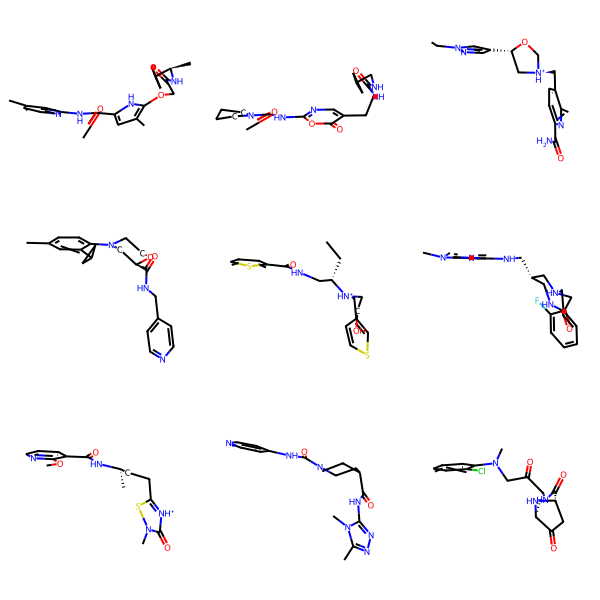

In [13]:
#载入数据
#绘制分子结构
mols = Chem.SDMolSupplier('./data/final_mtdh_snd1.sdf', removeHs=False)
cdk2mol = [m for m in mols][:9]
# for m in cdk2mol:
#     AllChem.EmbedMolecule(m, AllChem.ETKDGv2())
Draw.MolsToGridImage(cdk2mol)


`rdMolDescriptors._CalcCrippenContribs`是一个用于计算分子的Crippen规则贡献的函数。Crippen规则是一组用于描述分子的物化性质的指标，包括分子的疏水性和溶解度等。这个函数可以在RDKit Python库中使用。

In [14]:
cdk2mol2 = copy.deepcopy(cdk2mol)

crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(mol) for mol in cdk2mol2]

crippen_contribs

[[(0.08452, 2.464),
  (0.136, 3.509),
  (0.1581, 3.35),
  (0.1581, 3.35),
  (-0.3239, 2.202),
  (0.4619, 4.067),
  (-0.5188, 3.0),
  (-0.2783, 5.007),
  (0.1129, 0.2215),
  (0.136, 3.509),
  (-0.3239, 2.202),
  (0.5437, 3.853),
  (-0.4195, 1.182),
  (-0.2035, 2.753),
  (-0.2783, 5.007),
  (-0.1526, 0.0),
  (-0.7096, 2.173),
  (-0.2051, 2.731),
  (0.1441, 2.503),
  (0.0, 2.433),
  (0.1441, 2.503),
  (0.1441, 2.503),
  (0.136, 3.509),
  (0.08452, 2.464),
  (0.1581, 3.35),
  (0.1581, 3.35)],
 [(0.4833, 0.389),
  (-0.2783, 5.007),
  (-0.7096, 2.173),
  (-0.2035, 2.753),
  (0.0, 2.433),
  (0.1441, 2.503),
  (0.1441, 2.503),
  (-0.7096, 2.173),
  (-0.2035, 2.753),
  (-0.0516, 2.488),
  (0.136, 3.509),
  (0.1581, 3.35),
  (-0.3239, 2.202),
  (0.4619, 4.067),
  (-0.5188, 3.0),
  (-0.2783, 5.007),
  (0.4833, 0.389),
  (-0.3187, 1.839),
  (-0.2035, 2.753),
  (0.1441, 2.503),
  (0.1441, 2.503),
  (-0.2035, 2.753),
  (0.1552, 1.08),
  (-0.8186, 3.135),
  (0.1788, 3.135)],
 [(0.1441, 2.503),
  (-0.

`rdMolAlign.GetCrippenO3A`是一个用于分子对齐的函数，它使用Crippen规则作为评估标准。这个函数可以在RDKit Python库中使用。

In [15]:
ref = cdk2mol2[0]
ref_contrib = crippen_contribs[0]
targets = cdk2mol2[1:]
targets_contrib = crippen_contribs[1:]

for i, target in enumerate(targets):
    crippenO3A = rdMolAlign.GetCrippenO3A(target, ref, targets_contrib[i], ref_contrib)
    crippenO3A.Align()

In [16]:
w = Chem.SDWriter('./data/align.sdf')
w.write(ref)
for mol in targets:
    w.write(mol)
w.close()

In [26]:
#调用药效团特征显示函数
rdkit_package_path = "/DYZ/dyz1/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit"
showfeatpath = os.path.join(rdkit_package_path, 'Chem/Features/ShowFeats.py')

In [11]:
# Before align
v = PyMol.MolViewer()
v.DeleteAll()
process = subprocess.Popen(['python', showfeatpath, '--writeFeats','./data/align.sdf'], stdout=subprocess.PIPE)
stdout = process.communicate()[0]
png=v.GetPNG()
display.display(png)

ConnectionRefusedError: [Errno 111] Connection refused

## 手动实现氧族药效团查找

查找标准如下：
- 查找的氧族氢供体标准：氧或硫原子，不带电荷，含有1个氢。
- 氧族氢受体标准（部分）：不带氢原子，化合价为2，且不与氮原子相连


### 逻辑查找

In [20]:
atomPharma = {}
## 定义氧族原子
chalcogen = [8, 16]
mol = Chem.MolFromSmiles("COC(=O)O")
mol = Chem.AddHs(mol)
# 开始查找
for atom in mol.GetAtoms():
    p = []
    if atom.GetAtomicNum() == 1 or atom.GetAtomicNum() not in chalcogen:
        continue
    else:
        # 氢供体
        if atom.GetFormalCharge() == 0:
            nbrs = [x for x in atom.GetNeighbors()]
            HDflag = False
            for nbr in nbrs:
                if nbr.GetAtomicNum() == 1:
                    HDflag = True      
            if HDflag:
                p.append('HDonor')
        # 氢受体
        if atom.GetTotalValence() == 2:
            nbrs = [x for x in atom.GetNeighbors()]
            HAflag_1 = True
            HAflag_2 = True
            if len(nbrs) == 1:
                nbr = nbrs[0]
                if nbr.GetAtomicNum() == 7:
                    HAflag_1 = False
            else:
                for nbr in nbrs:
                    if nbr.GetAtomicNum() == 1:
                        HAflag_2 = False
                        
            if HAflag_1 and HAflag_2:
                p.append('HAcceptor')
            
    atomPharma[atom.GetIdx()] = [atom.GetAtomicNum(), ' '.join(p)]


In [21]:
atomPharma

{1: [8, 'HAcceptor'], 3: [8, 'HAcceptor'], 4: [8, 'HDonor']}

### SMARTS查找
- 氢供体：[O,S;H1;+0]
- 氢受体（部分）：[O;H0;v2;!$(O=N-*)]

In [24]:
# 定义smarts
HDonorSmarts = '[O,S;H1;+0]'
HAcceptorSmarts = '[O;H0;v2;!$(O=N-*)]'
HDonor = Chem.MolFromSmarts(HDonorSmarts)
HAcceptor = Chem.MolFromSmarts(HAcceptorSmarts)

atomPharma1 = {}
HDonors = mol.GetSubstructMatches(HDonor)
for i in HDonors:
    atom = mol.GetAtomWithIdx(i[0])
    atomPharma1[atom.GetIdx()] = [atom.GetAtomicNum(), 'HDonor']

# 氢受体
HAcceptors = mol.GetSubstructMatches(HAcceptor)
for i in HAcceptors:
    atom = mol.GetAtomWithIdx(i[0])
    atom_prop = atomPharma1.get(atom.GetIdx(), [])
    if atom_prop:
        atom_prop[1] = atom_prop[1] + ' HAcceptor'
        atomPharma1.update({atom.GetIdx():atom_prop})
    else:
        atomPharma1[atom.GetIdx()] = [atom.GetAtomicNum(), 'HAcceptor']
atomPharma1


{4: [8, 'HDonor'], 1: [8, 'HAcceptor'], 3: [8, 'HAcceptor']}

## 化学特征
Rdkit中有一系列基于SMARTS定义的化学特征。要对分子进行化学特征分析和计算时，需要先导入一个特征库，创建一个特征工厂，并通过特征工厂计算化学特征。

- 获取特征库：RDConfig.RDDataDir目录下的`BaseFeatures.fdef`
- 构建特征工厂：`ChemicalFeatures.BuildFeatureFactory(fdefName)`
fdefName：特征库文件

`BaseFeatures.fdef` 中定义了27个AtomFeature，属于7个Family。`MinimalFeatures.fdef` 中定义了8个AtomFeature，属于5个Family。药效团特征是根据Family来做的。

In [33]:
from rdkit.Chem import ChemicalFeatures

fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
factory

### 使用特征工厂搜索特征：`GetFeaturesForMol(m)`

In [35]:
m = Chem.MolFromSmiles('OCc1ccccc1CN')
feats = factory.GetFeaturesForMol(m)
print(len(feats))



8


搜索到的每个特征都包含了该特征家族（例如供体、受体等）、特征类别、该特征对应的原子、特征对应序号等信息。

- 特征家族信息：`GetFamily()`
- 特征类型信息：`GetType()`
- 特征对应原子：`GetAtomIds()`
- 特征对应序号：`GetId()`

In [36]:
print(feats[0].GetFamily())
print(feats[0].GetType())
print(feats[0].GetAtomIds())

Donor
SingleAtomDonor
(0,)


如果分子包含坐标信息，化学特征也会包括原子坐标：`GetPos()`

In [37]:
AllChem.Compute2DCoords(m)
list(feats[0].GetPos())

[2.0705367611607857, -2.3356749604090465, 0.0]

## 化学特征文件介绍

特征库就是一个特征定义文件（Feature Definition File, FDef）。该文件包含了一系列的化学特征及它们的所有信息，并通过SMARTS来表示。除了化学特征，FDef文件也有对原子类型的定义及解释，让特征更容易理解。

[SMARTS的语法](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)，[fdef文件的语法](https://rdkit.org/docs/RDKit_Book.html#syntax-of-the-fdef-file)



In [41]:
list(factory.GetFeatureDefs().items())[:2]

[('Donor.SingleAtomDonor',
  '[$([N&!H0&v3,N&!H0&+1&v4,n&H1&+0,$([$([Nv3](-C)(-C)-C)]),$([$(n[n;H1]),$(nc[n;H1])])]),$([O,S;H1;+0])]'),
 ('Acceptor.SingleAtomAcceptor',
  '[$([O;H1;v2]),$([O;H0;v2;!$(O=N-*),$([O;-;!$(*-N=O)]),$([o;+0])]),$([n;+0;!X3;!$([n;H1](cc)cc),$([$([N;H0]#[C&v4])]),$([N&v3;H0;$(Nc)])]),$([F;$(F-[#6]);!$(FC[F,Cl,Br,I])])]')]

### 化学特征（chemical features）

化学特征由一个特征类型（Feature Type）和特征家族（Feature Family）共同定义。特征家族是对特征总体上的分类，例如氢键供体、芳香性等。药效团匹配就是根据特征家族来实现的。而特征类型提供了关于特征的一些更详细的信息。每个特征类型包含了以下信息：
- 一个SMARTS表达式，定义了该特征类型所匹配的原子。
- 特征位置的权重，特征位置由原子位置决定。

FDef中包含两个概念：原子类型和特征。可以大致这么认为：原子类型是最底层的抽象，对相似的原子做了归类。特征是更高级的抽象，对相似的原子和原子类型再进行归类。以下都围绕原子类型定义和特征定义的语法展开

**原子类型（AtomType）定义**

- 原子类型定义相当于给用于查询原子的SMARTS起了一个别名，可以让FDef更具可读性。例如，可以用如下方式定义一个非极性碳原子，`Carbon_NonPolar`就是一个原子类型定义名称：
`AtomType Carbon_NonPolar [C&!$(C=[O,N,P,S])]`

- 因此，可以创建一个有利于理解和使用SMARTS的名称。要引用某个原子类型，可以写下该名称并用大括号括起来。例如，定义另一个原子类型，取名为Hphobe，让Hphobe包含Carbon_NonPolar：
`AtomType Carbon_NonPolar [C&!$(C=[O,N,P,S])]`
`AtomType Hphobe [{Carbon_NonPolar},c,s,S&H0&v2,F,Cl,Br,I]`

- 重复写下一个原子类型时，意味着把他们合在一起，相当于用“,”连接（在SMARTS中表示或），例如下面两个语句：
`AtomType d1 [N&!H0]`
`AtomType d1 [O&!H0]`

- 等价于：
`AtomType d1 [N&!H0,O&!H0]`

- 更简洁的写法：
`AtomType d1 [N,O;!H0]`

- 要注意“&”和“;”都表示“与”，“,”表示“或”，但“&”的优先级高于“,”，而“;”的优先级低于“,”。

- 类似与SMARTS，原子特征定义也可以用“!”来表示非，而“!”会与自身的表达式结合，例如：
`AtomType d1 [N,O,S]`
`AtomType !d1 [H0]`

- “!d1”等价于：
`AtomType d1 [!H0;N,O,S]`

**特征（Feature）定义**

- 特征定义比原子类型定义更复杂，并且需要多行实现，例如：
`DefineFeature HDonor1 [N,O;!H0]`   
`Family HBondDonor`   
`Weights 1.0`     
`EndFeature`     

- 特征定义的第一行包含了特征类型和所规定的SMARTS，第二行和第三行（没有先后顺序）定义了特征家族和原子权重（权重值的数量和SMARTS中包含的原子数量相同，有多个权重时，用逗号分隔）。原子权重用来计算特征的位置。最后一行表示结束定义，必须是“EndFeature”。原子类型定义和特征定义可以混在一起使用，只要在引用前定义好就行了。

**其它语法**

井号“#”开头表示注释，程序运行时会忽略该行。
反斜杠“\”结尾表示续行，也就是该行没有结束。
开头的空格将被忽略。


## 2D药效团指

2D药效团指纹，是在药效团的基础上，加上2D（拓扑）距离实现。当在药效团间加入了距离信息后，每个特征（药效团+距离）会被分配一个唯一的id，所有的id共同组成了分子的2D药效团指纹。指纹生成过程中，有两个关键参数，第一个是组成指纹的药效团数量，需要提供最少和最多药效团数。。第二个关键参数是拓扑距离区间，用于对两个药效团间的距离进行归类，对应下图的“distance bins”。根据药效团组成和距离的不同，形成不同的bit id。在Rdkit的体系中，药效团指纹的bit ids是没有经过哈希映射的，也就是说，指纹的每一位都代表了一组特征和它们的距离。所以，给定一个bit id，可以推出它对应的特征类型和距离，可以方便地对结果进行解释。


## 流程
生成药效团指纹首先要计算分子中所有的药效团（化学特征），化学特征的计算需要通过特征工厂实现。

- 构建特征工厂：

In [43]:
featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)
featFactory

使用特征工厂再来构建指纹工厂signature factory用于设置指纹参数。

构建指纹工厂：`SigFactory(featFactory, useCounts=False, minPointCount=2, maxPointCount=3, …)`
- featFactory：特征工厂。
- useCounts：默认False。False不考虑指纹频数，并生成SparseBitVect。
- minPointCount：默认为2。生成指纹时包括的最少的药效团数量。
- maxPointCount：默认为3。生成指纹时包括的最多的药效团数量。


In [44]:
from rdkit.Chem.Pharm2D.SigFactory import SigFactory
sigFactory = SigFactory(featFactory, minPointCount=2, maxPointCount=3)

sigFactory


- 对拓扑距离进行分段：SetBins()
- 每次修改参数后，都要初始化一下：Init()
- 计算一下的指纹长度：GetSigSize()

In [45]:
sigFactory.SetBins([(0,2), (2,5), (5,8)])
sigFactory.Init()
sigFactory.GetSigSize()



2988

指纹工厂生成2D指纹

计算2D药效团指纹：`Gen2DFingerprint(mol, sigFactory, bitInfo, …)`
- `mol`：要计算指纹的mol对象
- `sigFactory`：设置了参数的指纹工厂
- `bitInfo`：获取指纹id及对应原子

In [46]:
from rdkit.Chem.Pharm2D import Generate
mol = Chem.MolFromSmiles('OCC(=O)CCCN')
fp = Generate.Gen2DFingerprint(mol,sigFactory)
print(len(fp))
print(fp.GetNumOnBits())



2988
23


关于指纹每一位所代表特征的信息、特征的距离矩阵等信息，都可以通过signature factory来查看

In [50]:
print(list(fp.GetOnBits())[:5])

print(sigFactory.GetBitDescription(1))



[1, 7, 8, 10, 20]
Acceptor Acceptor |0 1|1 0|


### 修改FDef设置
如果不想要某个特征，可以直接通过`signature factory`来跳过某个特征，而不用去修改FDef文件。

查看现有的药效团（特征家族）列表：`GetFeatureFamilies()`

In [51]:
featFactory.GetFeatureFamilies()

('Donor',
 'Acceptor',
 'NegIonizable',
 'PosIonizable',
 'ZnBinder',
 'Aromatic',
 'Hydrophobe',
 'LumpedHydrophobe')

- 跳过某个药效团（特征家族）：`sigFactory.skipFeats`
- 每次修改都要初始化一下：`Inint()`
- 再查看一下指纹长度：`GetSigSize()`

In [53]:
sigFactory.skipFeats=['PosIonizable']
sigFactory.Init()
sigFactory.GetSigSize()

2100

重新生成新的指纹：`Gen2DFingerprint()`

In [54]:
fp2 = Generate.Gen2DFingerprint(mol,sigFactory)
fp2.GetNumOnBits()

15

## Gobbi 2D药效团指纹
Rdkit中还有一种用于生成2D药效团指纹的特征定义方式，根据Gobbi等人的设计实现，在 `rdkit.Chem.Pharm2D.Gobbi_Pharm2D`下有一个预定义的`signature factory`，已经包含了这些指纹类型，可以直接调用，操作方法类似。

In [55]:
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
m = Chem.MolFromSmiles('OCC=CC(=O)O')
fp = Generate.Gen2DFingerprint(m, Gobbi_Pharm2D.factory)
print(fp.GetNumOnBits())
 
print(list(fp.GetOnBits()))

Gobbi_Pharm2D.factory.GetBitDescription(157)



8
[23, 30, 150, 154, 157, 185, 28878, 30184]


'HA HD |0 3|3 0|'